<a href="https://colab.research.google.com/github/bhanurekha14/Corona-Detection-Analysis/blob/main/corona_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv("/content/corona_tested_006.csv")




Reading Dataset

In [3]:
print(df)

        Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
0            1  11-03-2020           TRUE  FALSE        TRUE   
1            2  11-03-2020          FALSE   TRUE       FALSE   
2            3  11-03-2020          FALSE   TRUE       FALSE   
3            4  11-03-2020           TRUE  FALSE       FALSE   
4            5  11-03-2020           TRUE  FALSE       FALSE   
...        ...         ...            ...    ...         ...   
278843  278844  30-04-2020          False  False       False   
278844  278845  30-04-2020          False  False       False   
278845  278846  30-04-2020          False  False       False   
278846  278847  30-04-2020          False  False       False   
278847  278848  30-04-2020          False  False       False   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
0                    FALSE    FALSE  negative         None    None   
1                    FALSE    FALSE  positive         None    None   
2                    

In [5]:
df.shape

(278848, 11)

In [6]:
df.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [9]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [10]:
print('=====Label Data=========')
df['Corona'].value_counts()

=====Label Data=========


negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [11]:
columns_to_replace = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
for column in columns_to_replace:
    df[column] = df[column].replace({"TRUE": True, "FALSE": False})
print(df['Cough_symptoms'].unique())
print(df['Cough_symptoms'].value_counts())
print(df['Fever'].unique())
print(df['Fever'].value_counts())
print(df['Sore_throat'].unique())
print(df['Sore_throat'].value_counts())
print(df['Shortness_of_breath'].unique())
print(df['Shortness_of_breath'].value_counts())
print(df['Headache'].value_counts())
print(df['Sex'].unique())
print(df['Sex'].value_counts())

[True False 'None']
False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64
[False True 'None']
False    256844
True      21752
None        252
Name: Fever, dtype: int64
[True False 'None']
False    276921
True       1926
None          1
Name: Sore_throat, dtype: int64
[False True 'None']
False    277270
True       1577
None          1
Name: Shortness_of_breath, dtype: int64
False    276433
True       2414
None          1
Name: Headache, dtype: int64
['None' 'male' 'female']
female    130158
male      129127
None       19563
Name: Sex, dtype: int64


In [12]:
columns_to_impute = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

for column in columns_to_impute:
    mode_value = df[column].mode()[0]
    df[column] = df[column].replace('None', mode_value)
    # If using a specific category like "Unknown" instead of mode, use the following line:
    # corona[column] = corona[column].replace('None', 'Unknown')

    # Print updated value counts
    print(f"Updated Value Counts for {column}:\n{df[column].value_counts()}\n")

Updated Value Counts for Cough_symptoms:
False    236620
True      42228
Name: Cough_symptoms, dtype: int64

Updated Value Counts for Fever:
False    257096
True      21752
Name: Fever, dtype: int64

Updated Value Counts for Sore_throat:
False    276922
True       1926
Name: Sore_throat, dtype: int64

Updated Value Counts for Shortness_of_breath:
False    277271
True       1577
Name: Shortness_of_breath, dtype: int64

Updated Value Counts for Headache:
False    276434
True       2414
Name: Headache, dtype: int64

Updated Value Counts for Age_60_above:
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

Updated Value Counts for Sex:
female    149721
male      129127
Name: Sex, dtype: int64

Updated Value Counts for Known_contact:
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64



In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# One-Hot Encoding for Nominal Variables
nominal_columns = ['Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Sex',  'Known_contact', 'Cough_symptoms']
corona_encoded = pd.get_dummies(df, columns=nominal_columns)
# Label Encoding for Ordinal Variable
le = LabelEncoder()
corona_encoded['Age_60_above'] = le.fit_transform(df['Age_60_above'])

Label Data Count
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64


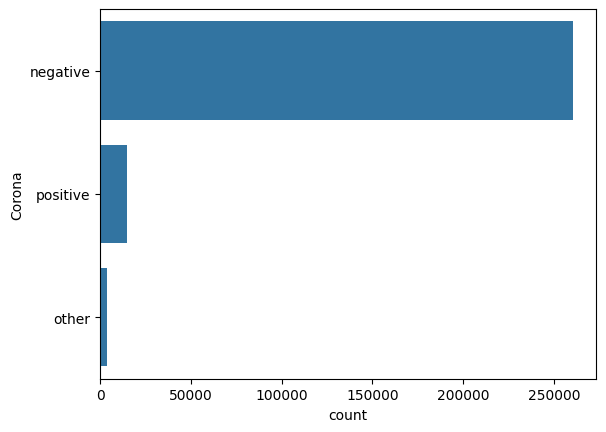

In [14]:
#Categories Information
target_temp = corona_encoded['Corona'].value_counts()
print("Label Data Count")
print(target_temp)
ax = sns.countplot(df['Corona'])
corona_encoded['Corona'].replace({'positive':1,'negative':0,'other':2},inplace =True)
best_features=df
y=best_features["Corona"]

In [15]:
df['Headache'].value_counts()

False    276434
True       2414
Name: Headache, dtype: int64

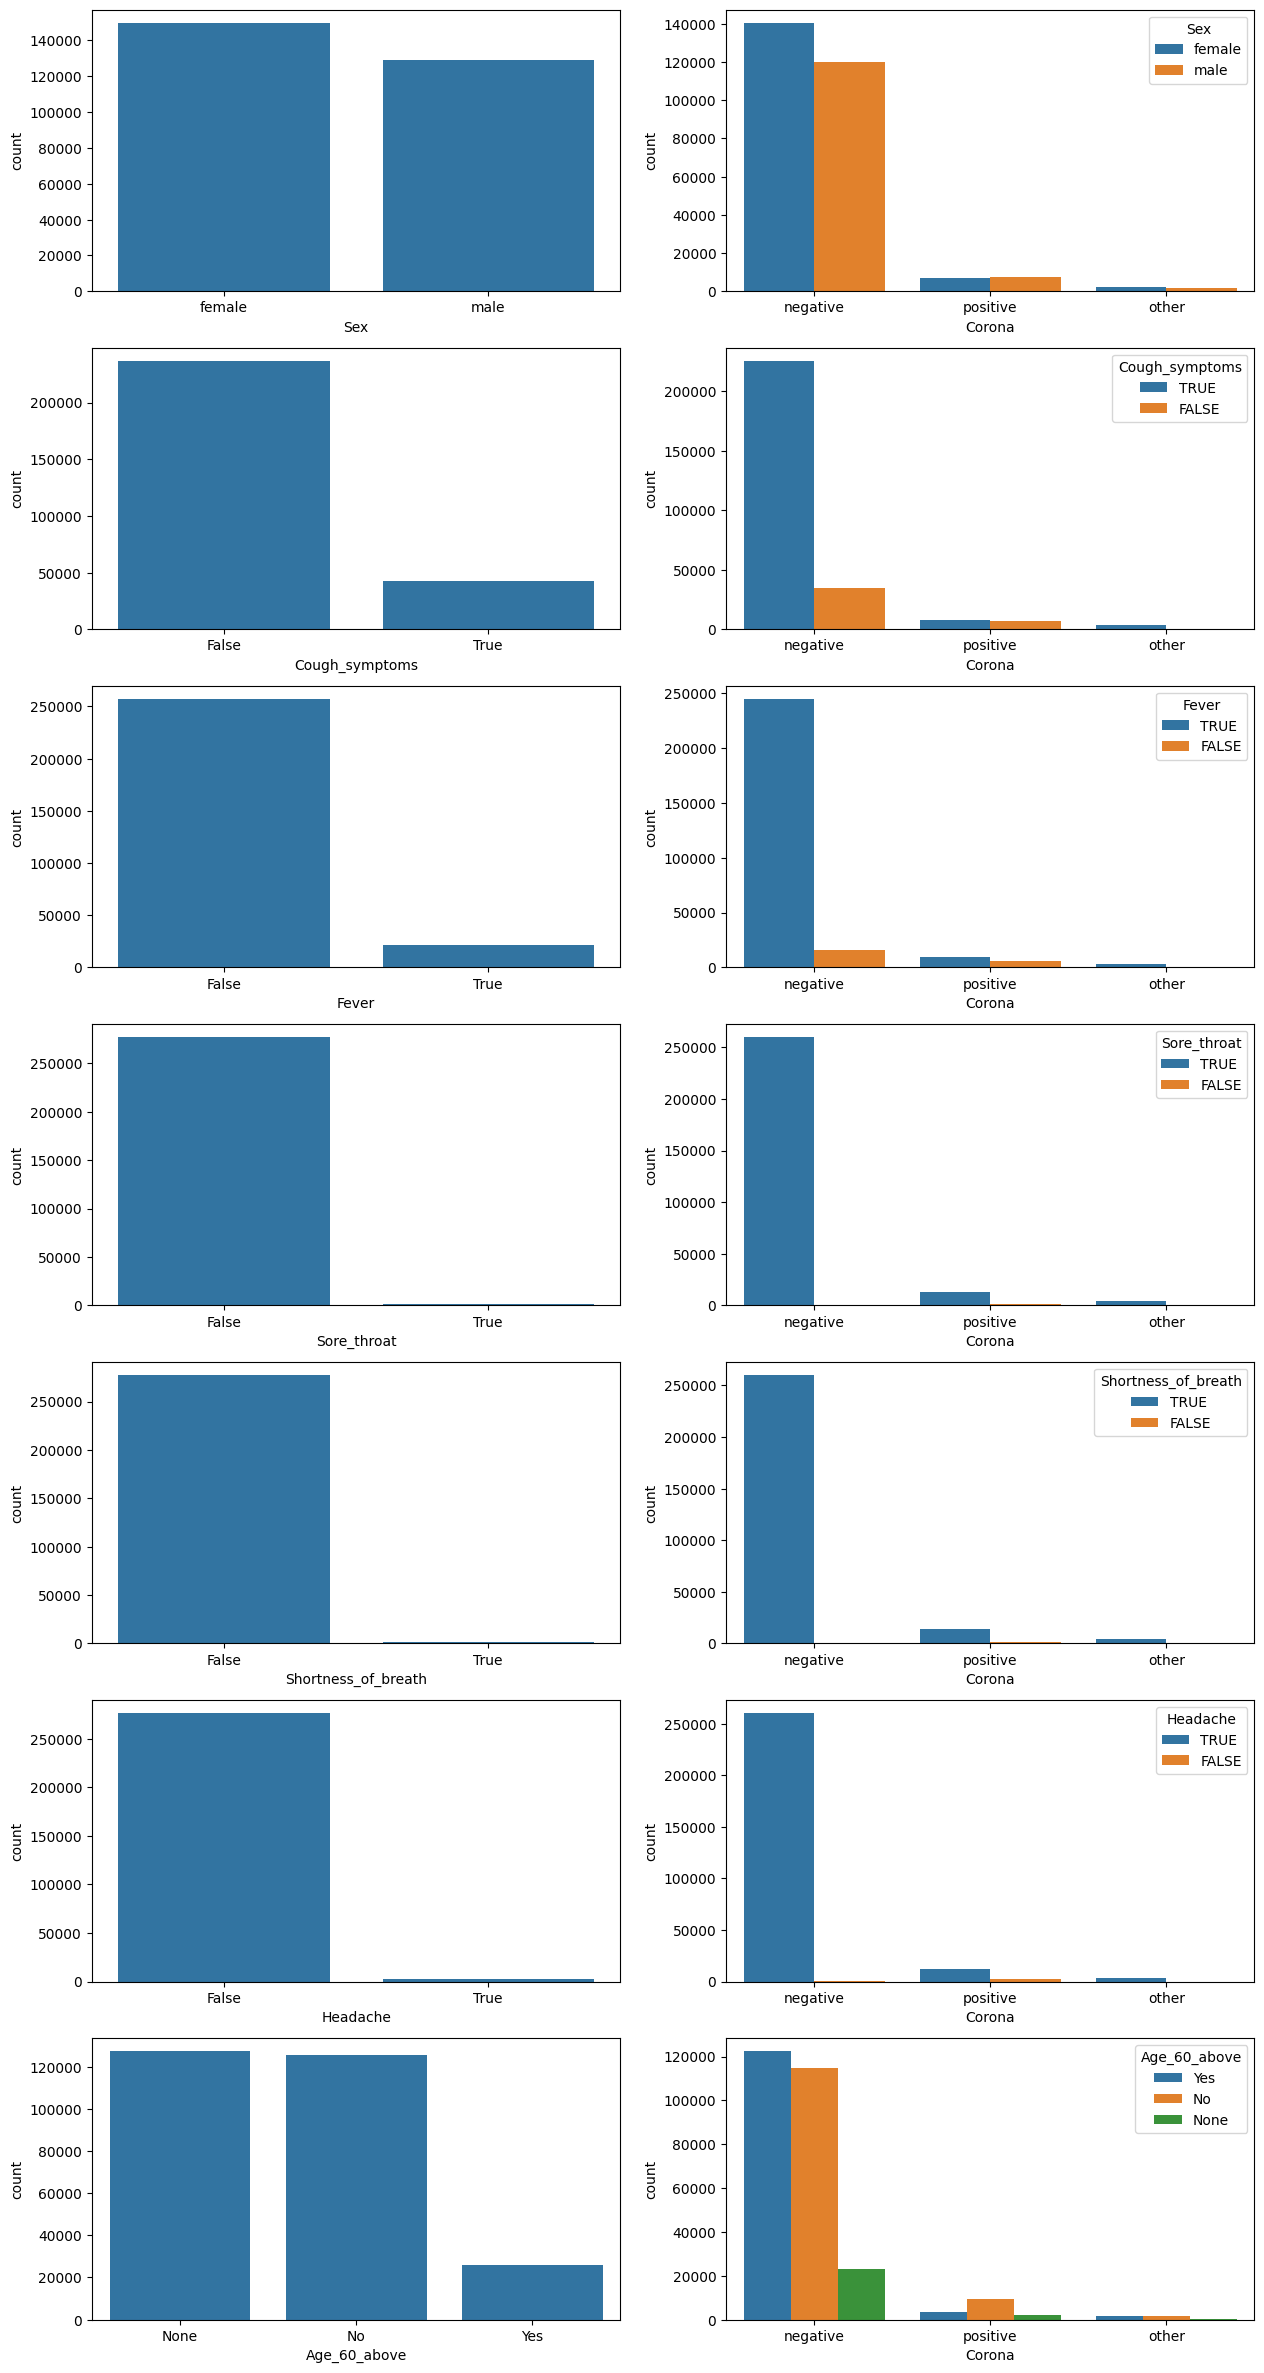

In [16]:
data=df
# data['Corona'].replace({'positive':1,'negative':0,'other':2},inplace =True)

def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    # else:
    #     [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='Corona', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'Corona']].groupby([attribute], as_index=False).mean()
    # sns.barplot(x=attribute, y=data['Corona'], hue=attribute, data=avg, ax=axes[ax_index][2])
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    # for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
    #      t.set_text(l)
categorial = [('Sex', ['female', 'male']),
              ('Cough_symptoms', ['TRUE', 'FALSE']),
              ('Fever', ['TRUE', 'FALSE']),
              ('Sore_throat', ['TRUE', 'FALSE']),
              ('Shortness_of_breath', ['TRUE', 'FALSE']),
              ('Headache', ['TRUE', 'FALSE']),
              ('Age_60_above', ['Yes', 'No', 'None'])]
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=2, figsize=(15, 30))
plotGrid(isCategorial=True)
plt.show()

In [17]:
print(data['Cough_symptoms'].value_counts())
print(data['Fever'].value_counts())
print(data['Sore_throat'].value_counts())
print(data['Shortness_of_breath'].value_counts())
print(data['Headache'].value_counts())
print(data['Corona'].value_counts())
print(data['Age_60_above'].value_counts())
print(data['Sex'].value_counts())
print(data['Known_contact'].value_counts())

False    236620
True      42228
Name: Cough_symptoms, dtype: int64
False    257096
True      21752
Name: Fever, dtype: int64
False    276922
True       1926
Name: Sore_throat, dtype: int64
False    277271
True       1577
Name: Shortness_of_breath, dtype: int64
False    276434
True       2414
Name: Headache, dtype: int64
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64
female    149721
male      129127
Name: Sex, dtype: int64
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64


In [18]:
print("==========Preprocessed_data=====")
corona_encoded

==========Preprocessed_data=====


,Ind_ID,Test_date,Corona,Age_60_above,Fever_False,Fever_True,Sore_throat_False,Sore_throat_True,Shortness_of_breath_False,Shortness_of_breath_True,Headache_False,Headache_True,Sex_female,Sex_male,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other,Cough_symptoms_False,Cough_symptoms_True
0,1,11-03-2020,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
1,2,11-03-2020,1,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0
2,3,11-03-2020,1,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0
3,4,11-03-2020,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1
4,5,11-03-2020,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,1,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0
278844,278845,30-04-2020,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0
278845,278846,30-04-2020,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0
278846,278847,30-04-2020,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0


In [19]:
y=corona_encoded['Corona']
fdrop= corona_encoded.drop(columns='Ind_ID')
fdrop4= fdrop.drop(columns='Corona')
X= fdrop4.drop(columns='Test_date')
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini')
X.head()
Y=y
Y=pd.DataFrame(Y)
Y.head()
# Training Data
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=0)
print("Training set has {} samples.".format(train_X.shape[0]))
print("Testing set has {} samples.".format(test_X.shape[0]))

Training set has 223078 samples.
Testing set has 55770 samples.


In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The accuracy is:  95.4204769589385
The precision is:  97.48169925241437
The recall is:  95.4204769589385
The fscore is:  96.36699875543047
Confusion matrix, without normalization


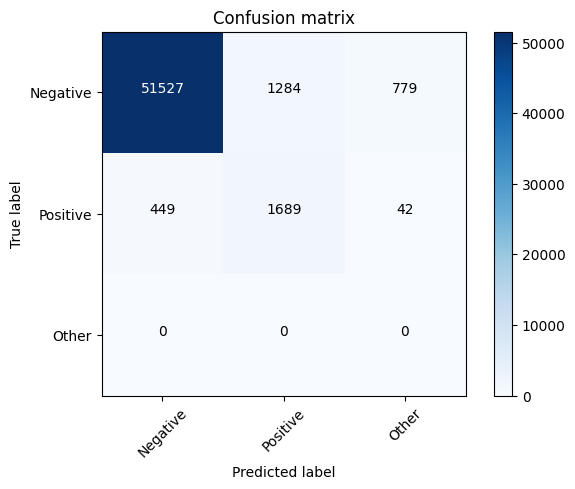

In [21]:
model_dt=dt.fit(train_X,train_Y)
dt_predict=model_dt.predict(test_X)
print('The accuracy is: ' , 100.0 * accuracy_score(dt_predict,test_Y))
precision,recall,fscore,none= precision_recall_fscore_support(dt_predict,test_Y, average='weighted')
print('The precision is: ' , 100.0 * precision)
print('The recall is: ' , 100.0 * recall)
print('The fscore is: ' , 100.0 * fscore)
# print(classification_report(y_true,y_predict))
cm = metrics.confusion_matrix(dt_predict,test_Y)
plot_confusion_matrix(cm, classes=['Negative', 'Positive','Other'])

The accuracy is:  95.40254617177693
The precision is:  97.51832660622422
The recall is:  95.40254617177693
The fscore is:  96.3672068716102
Confusion matrix, without normalization


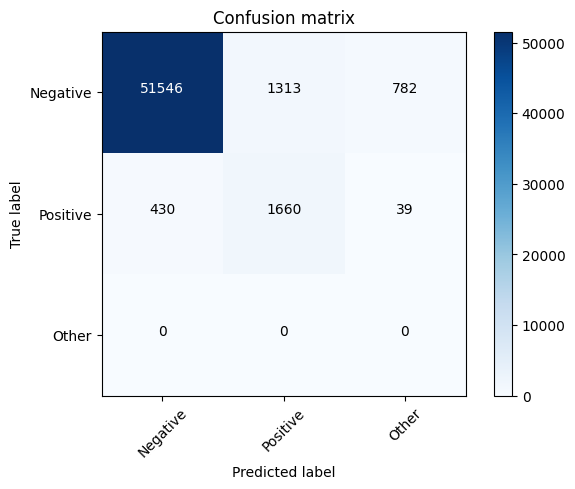

In [22]:
import xgboost as xgb
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(train_X,train_Y)
xg_predict=xg.predict(test_X)
print('The accuracy is: ' , 100.0 * accuracy_score(xg_predict,test_Y))
precision,recall,fscore,none= precision_recall_fscore_support(xg_predict,test_Y, average='weighted')
print('The precision is: ' , 100.0 * precision)
print('The recall is: ' , 100.0 * recall)
print('The fscore is: ' , 100.0 * fscore)
# print(classification_report(y_true,y_predict))
cm = metrics.confusion_matrix(xg_predict,test_Y)
plot_confusion_matrix(cm, classes=['Negative', 'Positive','Other'])

The accuracy is:  95.1335843643536
The precision is:  96.83405929857713
The recall is:  95.1335843643536
The fscore is:  95.95835027327546
Confusion matrix, without normalization


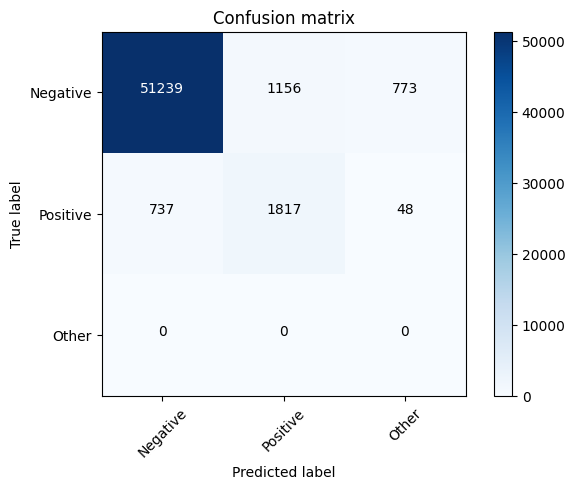

In [23]:
from sklearn.svm import SVC
SVM=SVC(kernel ='linear', C = 1.0, random_state=0)
# fit classifier to training set
SVM.fit(train_X,train_Y)
SVM_predict=SVM.predict(test_X)
print('The accuracy is: ' , 100.0 * accuracy_score(SVM_predict,test_Y))
precision,recall,fscore,none= precision_recall_fscore_support(SVM_predict,test_Y, average='weighted')
print('The precision is: ' , 100.0 * precision)
print('The recall is: ' , 100.0 * recall)
print('The fscore is: ' , 100.0 * fscore)
cm = metrics.confusion_matrix(SVM_predict,test_Y)
plot_confusion_matrix(cm, classes=['Negative', 'Positive','Other'])

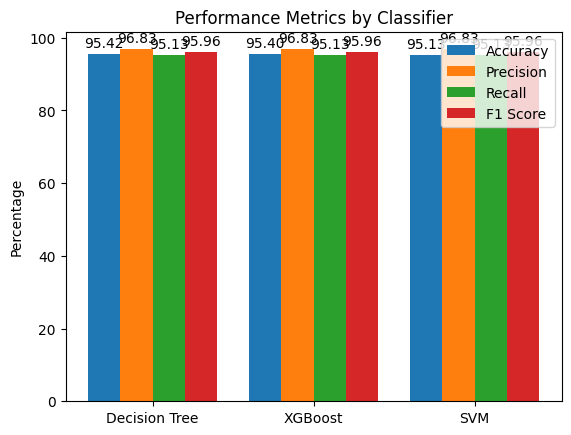

In [30]:
import matplotlib.pyplot as plt
import numpy as np



models = ['Decision Tree', 'XGBoost', 'SVM']
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting the bar chart
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()

for i, metric_label in enumerate(metrics_labels):
    bars = ax.bar(x + i * width, metrics[i], width, label=metric_label)
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Percentage')
ax.set_title('Performance Metrics by Classifier')
ax.set_xticks(x + width * (len(metrics_labels) - 1) / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()